# Catboost

Tien-Thinh

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split 
from catboost.utils import eval_metric
from numba import jit
# from fast_soft_sort.pytorch_ops import soft_rank



In [3]:
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [4]:
X_train


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,0.509514,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,1.666252,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [7]:
len(X_train.DAY_ID.unique())*2

1702

# Test NAN

In [8]:
sum(np.isnan(Y_train).ID)

0

In [9]:
sum(Y_train.ID == X_train.ID)

1494

In [10]:
X_train.isna().describe()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,...,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494
unique,1,1,1,1,1,2,2,2,2,2,...,1,2,2,2,2,2,2,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1494,1494,1494,1494,1494,1469,1469,1370,1424,1370,...,1494,1400,1400,1400,1400,1400,1400,1494,1494,1494


In [11]:
X_test.isna().describe()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,654,654,654,654,654,654,654,654,654,654,...,654,654,654,654,654,654,654,654,654,654
unique,1,1,1,1,1,2,2,2,2,2,...,1,2,2,2,2,2,2,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,654,654,654,654,654,645,645,607,630,607,...,654,614,614,614,614,614,614,654,654,654


In [12]:
Y_train

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


# trainning data

In [5]:
X_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [73]:
def get_ranks(arr: np.ndarray) -> np.ndarray:
    """
        Efficiently calculates the ranks of the data.
        Only sorts once to get the ranked data.
        
        :param arr: A 1D NumPy Array
        :return: A 1D NumPy Array containing the ranks of the data
    """
    temp = arr.argsort(kind='stable')
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(arr))
    return ranks


In [74]:
X_train_clean = X_train.drop(['ID'], axis=1)
Y_train_clean = Y_train['TARGET'].to_frame()


In [79]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_clean, Y_train_clean, test_size=0.03
)


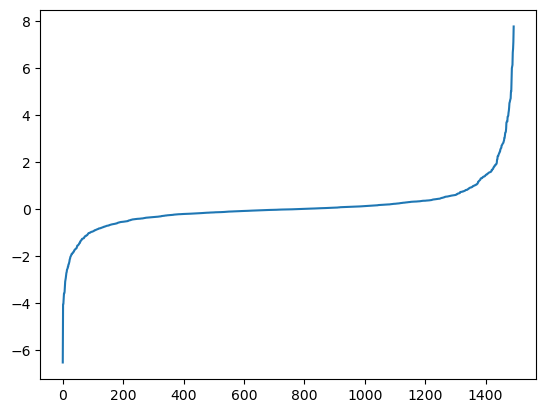

In [80]:
y_train_split["RANK"] = get_ranks(y_train_split.TARGET)
y_test_split["RANK"] = get_ranks(y_test_split.TARGET)
Y_train_clean["RANK"] = get_ranks(Y_train_clean.TARGET)
Y_train_clean = Y_train_clean.sort_values(by = 'RANK')
plt.plot(Y_train_clean.RANK, Y_train_clean.TARGET)

In [81]:
model = CatBoostRegressor(iterations=1000, loss_function="MAE")

In [85]:
model.fit(
    X_train_split, np.tanh(y_train_split.TARGET), 
    cat_features=["COUNTRY", "DAY_ID"], 
    eval_set=(X_test_split, np.tanh(y_test_split.TARGET)), 
    use_best_model=True
)

0:	learn: 0.3425063	test: 0.4191143	best: 0.4191143 (0)	total: 10.9ms	remaining: 10.9s
1:	learn: 0.3420778	test: 0.4189743	best: 0.4189743 (1)	total: 22.9ms	remaining: 11.4s
2:	learn: 0.3418588	test: 0.4187472	best: 0.4187472 (2)	total: 37ms	remaining: 12.3s
3:	learn: 0.3416541	test: 0.4184043	best: 0.4184043 (3)	total: 52.8ms	remaining: 13.1s
4:	learn: 0.3413394	test: 0.4182577	best: 0.4182577 (4)	total: 64.8ms	remaining: 12.9s
5:	learn: 0.3409084	test: 0.4178787	best: 0.4178787 (5)	total: 76.9ms	remaining: 12.7s
6:	learn: 0.3404596	test: 0.4177339	best: 0.4177339 (6)	total: 91.3ms	remaining: 13s
7:	learn: 0.3400956	test: 0.4175542	best: 0.4175542 (7)	total: 108ms	remaining: 13.4s
8:	learn: 0.3394550	test: 0.4172615	best: 0.4172615 (8)	total: 118ms	remaining: 13s
9:	learn: 0.3390717	test: 0.4166988	best: 0.4166988 (9)	total: 129ms	remaining: 12.7s
10:	learn: 0.3385602	test: 0.4170089	best: 0.4166988 (9)	total: 146ms	remaining: 13.2s
11:	learn: 0.3383285	test: 0.4169906	best: 0.4166988

16:	learn: 0.3365323	test: 0.4157896	best: 0.4157896 (16)	total: 214ms	remaining: 12.4s
17:	learn: 0.3362799	test: 0.4162102	best: 0.4157896 (16)	total: 223ms	remaining: 12.1s
18:	learn: 0.3358253	test: 0.4170839	best: 0.4157896 (16)	total: 235ms	remaining: 12.1s
19:	learn: 0.3356832	test: 0.4169696	best: 0.4157896 (16)	total: 249ms	remaining: 12.2s
20:	learn: 0.3354257	test: 0.4169727	best: 0.4157896 (16)	total: 262ms	remaining: 12.2s
21:	learn: 0.3352083	test: 0.4165960	best: 0.4157896 (16)	total: 271ms	remaining: 12.1s
22:	learn: 0.3348117	test: 0.4164541	best: 0.4157896 (16)	total: 280ms	remaining: 11.9s
23:	learn: 0.3345905	test: 0.4164176	best: 0.4157896 (16)	total: 290ms	remaining: 11.8s
24:	learn: 0.3343006	test: 0.4164986	best: 0.4157896 (16)	total: 304ms	remaining: 11.9s
25:	learn: 0.3339849	test: 0.4161281	best: 0.4157896 (16)	total: 323ms	remaining: 12.1s
26:	learn: 0.3335987	test: 0.4168561	best: 0.4157896 (16)	total: 344ms	remaining: 12.4s
27:	learn: 0.3333096	test: 0.416

In [86]:
output = model.predict(X_test_split)

In [87]:
spearmanr(y_test_split.TARGET, output)

SpearmanrResult(correlation=0.1549407114624506, pvalue=0.30949633093661455)

# CATBOOST

In [216]:
import torch
class SpearmanCorrelationObjective(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)

        result = []
        pred = pred = torch.tensor(approxes, requires_grad=True)
        target = torch.from_numpy(targets)
        s = self.spearman(target,pred, regularization= 1e-2)
        der1 = torch.autograd.grad(s, pred)[0]
        der2 = np.ones_like(der1)
        if weights is not None:
            der1 *= weights[index]
            der2 *= weights[index]

        result.append((der1, der2))
        return result

    def corrcoef(self, target, pred):
        pred_n = pred - pred.mean()
        target_n = target - target.mean()
        pred_n = pred_n / pred_n.norm()
        target_n = target_n / target_n.norm()
        return (pred_n * target_n).sum()

    def spearman(self,
        target,
        pred,
        regularization="l2",
        regularization_strength=1.0,
    ):
        # fast_soft_sort uses 1-based indexing, divide by len to compute percentage of rank
        pred = soft_rank(
            pred,
            regularization=regularization,
            regularization_strength=regularization_strength,
        )
        return self.corrcoef(target, pred / pred.shape[-1])

In [217]:
model = CatBoostRegressor(iterations=100, loss_function=SpearmanCorrelationObjective(), eval_metric=SpearmanCorrelationMetric())


In [218]:
model.fit(
    X_train_split, y_train_split, 
    cat_features=["COUNTRY", "DAY_ID"], 
    eval_set=(X_test_split, y_test_split), 
    use_best_model=True
)

/Users/jacq/anaconda3/lib/python3.10/site-packages/catboost/core.py:2268: UserWarning: Can't optimze method "calc_ders_range" because self argument is used
  _check_train_params(params)
/Users/jacq/anaconda3/lib/python3.10/site-packages/catboost/core.py:2268: UserWarning: Can't optimze method "evaluate" because self argument is used
  _check_train_params(params)


CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/python-package/catboost/helpers.cpp:49: Traceback (most recent call last):
  File "_catboost.pyx", line 1412, in _catboost._ObjectiveCalcDersRange
  File "/var/folders/p5/_7572z250s306k38mcqggqc00000gn/T/ipykernel_89017/2501788533.py", line 11, in calc_ders_range
    s = self.spearman(target,pred, regularization= 1e-2)
  File "/var/folders/p5/_7572z250s306k38mcqggqc00000gn/T/ipykernel_89017/2501788533.py", line 35, in spearman
    pred = soft_rank(
  File "/Users/jacq/anaconda3/lib/python3.10/site-packages/fast_soft_sort/pytorch_ops.py", line 67, in soft_rank
    raise ValueError("'values' should be a 2d-tensor "
ValueError: 'values' should be a 2d-tensor but got 1000.


In [59]:
output = model.predict(X_test_split)
correlationCoefficient(output, pd.Series(y_test_split).array)

0.43201581027667985

In [99]:
def metric_train(output):

    return  spearmanr(output, y_test_split).correlation

output = model.predict(X_test_split)
print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(output) ))

<class 'numpy.ndarray'>
Spearman correlation for the train set: 43.2%


In [157]:
X_test_clean = X_test.drop(['ID'], axis=1)
Y_test_submission = X_test[['ID']].copy()
Y_test_submission['TARGET'] = model.predict(X_test_clean)
Y_test_submission.to_csv('benchmark_qrt.csv', index=False)
model.get_params()

{'iterations': 1000,
 'loss_function': 'MAE',
 'eval_metric': <__main__.SpearmanCorrelationMetric at 0x7faf52c34190>}

# XGBOOST


In [293]:
from xgboost import XGBRegressor
from fast_soft_sort.pytorch_ops import soft_rank

def corrcoef(target, pred):
    # np.corrcoef in torch from @mdo
    # https://forum.numer.ai/t/custom-loss-functions-for-xgboost-using-pytorch/960
    pred_n = pred - pred.mean()
    target_n = target - target.mean()
    pred_n = pred_n / pred_n.norm()
    target_n = target_n / target_n.norm()
    return (pred_n * target_n).sum()


def spearman(
    target,
    pred,
    regularization="l2",
    regularization_strength=1e-3,
):
    
    pred = soft_rank(
        pred,
        regularization=regularization,
        regularization_strength=regularization_strength,
    )
    return corrcoef(target, pred / pred.shape[-1])


def custom_loss(ytrue, ypred):
    ytrue = pd.Series(ytrue).array
    lenypred = ypred.shape[0]
    lenytrue = ytrue.shape[0]

    ypred_th = torch.tensor(ypred.reshape(1, lenypred), requires_grad=True)
    ytrue_th = torch.tensor(ytrue.reshape(1, lenytrue))

    loss = spearman(ytrue_th, ypred_th, regularization_strength=3)
    print(f'Current loss:{loss}')

    # calculate gradient and convert to numpy
    loss_grads = torch.autograd.grad(loss, ypred_th)[0]
    loss_grads = loss_grads.detach().numpy()

    # return gradient and ones instead of Hessian diagonal
    return -loss_grads[0], np.ones(loss_grads.shape)[0]

XGB = XGBRegressor(obj = custom_loss)
X_train_split1 = X_train_split.drop(['COUNTRY'], axis=1).fillna(0)

XGB.fit(
    X_train_split1, y_train_split, 
)

X_test_split1 = X_test_split.drop(['COUNTRY'], axis=1).fillna(0)
ypred = XGB.predict(X_test_split1)


In [307]:
Y_fin = pd.read_csv('benchmark_qrt.csv')

def _get_ranks(arr: np.ndarray) -> np.ndarray:
    """
        Efficiently calculates the ranks of the data.
        Only sorts once to get the ranked data.
        
        :param arr: A 1D NumPy Array
        :return: A 1D NumPy Array containing the ranks of the data
    """
    temp = arr.argsort(kind='stable')
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(arr))
    return ranks
Y_rank = Y_fin[['ID']].copy()
Y_rank['TARGET'] = _get_ranks(Y_fin.TARGET)
Y_rank.to_csv('benchmark_qrt.csv', index=False)

